In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/survey lung cancer.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
#YES=2 , NO=1.
df.shape

(309, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [ ]:
df.duplicated().sum()

33

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['GENDER'] = le.fit_transform(df['GENDER'])
df['LUNG_CANCER'] = le.fit_transform(df['LUNG_CANCER'])
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


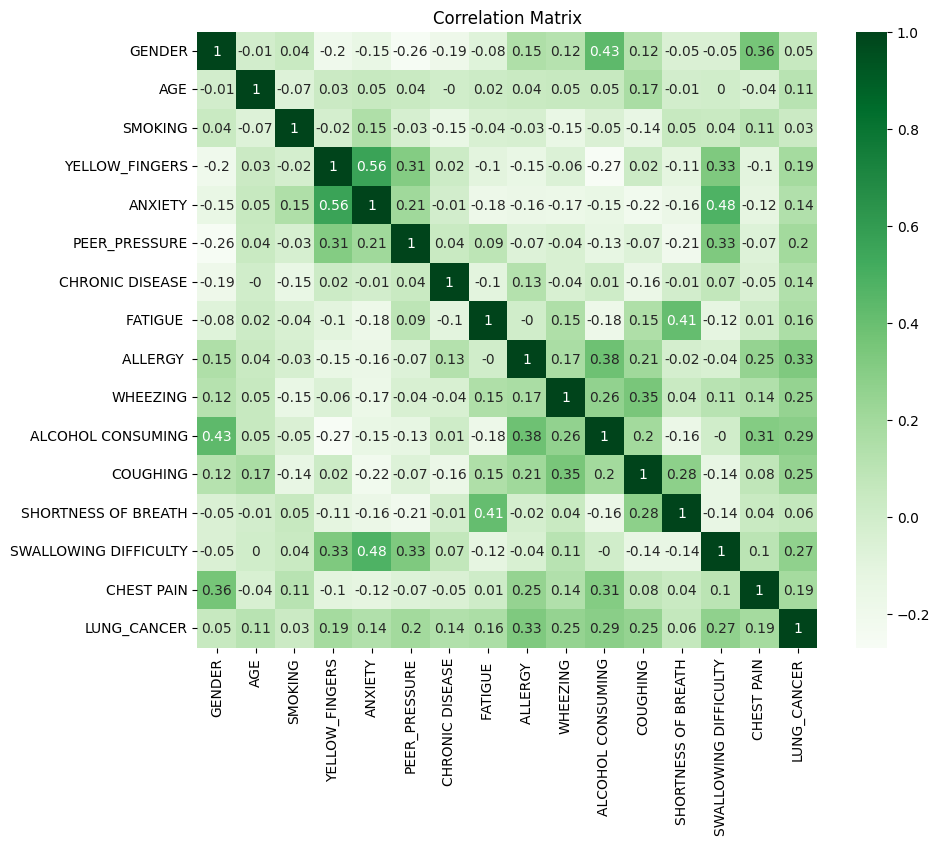

In [ ]:
plt.figure(figsize=(10,8))
dataplot = sns.heatmap(df.corr().round(2), cmap="Greens", annot=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
print(df.columns)

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')


In [ ]:
columns_to_replace = ['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']

for column in columns_to_replace:
    if column in df.columns:
        df[column] = df[column].replace({1: 0, 2: 1})
    else:
        print(f"Column '{column}' not found in the DataFrame.")
df.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
5,0,75,0,1,0,0,1,1,1,1,0,1,1,0,0,1
6,1,52,1,0,0,0,0,1,0,1,1,1,1,0,1,1
7,0,51,1,1,1,1,0,1,1,0,0,0,1,1,0,1
8,0,68,1,0,1,0,0,1,0,0,0,0,0,0,0,0
9,1,53,1,1,1,1,1,0,1,0,1,0,0,1,1,1


In [ ]:
X=df.drop(['LUNG_CANCER'],axis=1)
y=df['LUNG_CANCER']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#X_train=scaler.fit_transform(X_train)
#X_test=scaler.transform(X_test)

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=15)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=15)

In [ ]:
rf_pred=rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy:",accuracy_score(y_test,rf_pred))

Accuracy: 0.8571428571428571


In [ ]:
confusion_matrix(y_test,rf_pred)

array([[ 4,  8],
       [ 0, 44]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50        12
           1       0.85      1.00      0.92        44

    accuracy                           0.86        56
   macro avg       0.92      0.67      0.71        56
weighted avg       0.88      0.86      0.83        56



In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("Mean squared error:",mean_squared_error(y_test,rf_pred,squared=False))
print("Mean absolute error:",mean_absolute_error(y_test,rf_pred))

Mean squared error: 0.3779644730092272
Mean absolute error: 0.14285714285714285


## Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [ ]:
ada_pred=ada.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy:",accuracy_score(y_test,ada_pred))

Accuracy: 0.8928571428571429


In [ ]:
confusion_matrix(y_test,ada_pred)

array([[ 6,  6],
       [ 0, 44]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ada_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        12
           1       0.88      1.00      0.94        44

    accuracy                           0.89        56
   macro avg       0.94      0.75      0.80        56
weighted avg       0.91      0.89      0.88        56



In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("Mean squared error:",mean_squared_error(y_test,ada_pred,squared=False))
print("Mean absolute error:",mean_absolute_error(y_test,ada_pred))

Mean squared error: 0.32732683535398854
Mean absolute error: 0.10714285714285714


##Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
gb_pred=gb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,gb_pred)

0.875

In [ ]:
confusion_matrix(y_test,gb_pred)

array([[ 5,  7],
       [ 0, 44]])

In [ ]:
gb_pred=gb.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,gb_pred))

              precision    recall  f1-score   support

           0       1.00      0.42      0.59        12
           1       0.86      1.00      0.93        44

    accuracy                           0.88        56
   macro avg       0.93      0.71      0.76        56
weighted avg       0.89      0.88      0.85        56



In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,gb_pred,squared=False)

0.3535533905932738

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,gb_pred)

0.125

##Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier




# Create base classifiers
lr_classifier = LogisticRegression(max_iter=10000)
svm_classifier = SVC(probability=True)  # Set probability=True for soft voting
knn_classifier = KNeighborsClassifier(n_neighbors=15)
nb_classifier = GaussianNB()
dt_classifier = DecisionTreeClassifier()

# Create a Bagging Classifier with the base classifiers
bagging_lr = BaggingClassifier(estimator=lr_classifier, n_estimators=10, random_state=42)
bagging_svm = BaggingClassifier(estimator=svm_classifier, n_estimators=10, random_state=42)
bagging_knn = BaggingClassifier(estimator=knn_classifier, n_estimators=10, random_state=42)
bagging_nb = BaggingClassifier(estimator=nb_classifier, n_estimators=10, random_state=42)
bagging_dt = BaggingClassifier(estimator=dt_classifier, n_estimators=10, random_state=42)

# Fit the Bagging Classifiers on the training data
bagging_lr.fit(X_train, y_train)
bagging_svm.fit(X_train, y_train)
bagging_knn.fit(X_train, y_train)
bagging_nb.fit(X_train, y_train)
bagging_dt.fit(X_train, y_train)

# Make predictions using the Bagging Classifiers
y_pred_lr = bagging_lr.predict(X_test)
y_pred_svm = bagging_svm.predict(X_test)
y_pred_knn = bagging_knn.predict(X_test)
y_pred_nb = bagging_nb.predict(X_test)
y_pred_dt = bagging_dt.predict(X_test)

# Calculate and print accuracy scores for each Bagging Classifier

print("Bagging Logistic Regression Score:",accuracy_score(y_test, y_pred_lr))
print("Bagging SVM Score:", accuracy_score(y_test, y_pred_svm))
print("Bagging K-Nearest Neighbors Score:", accuracy_score(y_test, y_pred_knn))
print("Bagging Naive Bayes Score:", accuracy_score(y_test, y_pred_nb))
print("Bagging Decision Tree Score:", accuracy_score(y_test, y_pred_dt))



Bagging Logistic Regression Score: 0.9107142857142857
Bagging SVM Score: 0.7857142857142857
Bagging K-Nearest Neighbors Score: 0.7857142857142857
Bagging Naive Bayes Score: 0.9285714285714286
Bagging Decision Tree Score: 0.8928571428571429


In [ ]:
confusion_matrix(y_test,y_pred_nb)

array([[ 9,  3],
       [ 1, 43]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.93      0.98      0.96        44

    accuracy                           0.93        56
   macro avg       0.92      0.86      0.89        56
weighted avg       0.93      0.93      0.93        56



In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("Mean squared error:",mean_squared_error(y_test,y_pred_nb,squared=False))
print("Mean absolute error:",mean_absolute_error(y_test,y_pred_nb))

Mean squared error: 0.2672612419124244
Mean absolute error: 0.07142857142857142


##Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Define the base classifiers
base_classifiers = [
    ('lr', LogisticRegression(max_iter=10000)),
    ('svm', SVC(probability=True)),
    ('knn', KNeighborsClassifier(n_neighbors=15)),
    ('nb', GaussianNB()),
    ('dt', DecisionTreeClassifier())

]

# Define the meta-classifier (you can choose any classifier)
#meta_classifier = GaussianNB()

# Create the stacking classifier
stacking_classifier_lr = StackingClassifier(estimators=base_classifiers, final_estimator=LogisticRegression(max_iter=10000))
stacking_classifier_svm = StackingClassifier(estimators=base_classifiers, final_estimator=SVC(probability=True))
stacking_classifier_knn = StackingClassifier(estimators=base_classifiers, final_estimator=KNeighborsClassifier(n_neighbors=15))
stacking_classifier_nb = StackingClassifier(estimators=base_classifiers, final_estimator=GaussianNB())
stacking_classifier_dt = StackingClassifier(estimators=base_classifiers, final_estimator=DecisionTreeClassifier())

# Train the stacking classifier on the training data
stacking_classifier_lr.fit(X_train, y_train)
stacking_classifier_svm.fit(X_train, y_train)
stacking_classifier_knn.fit(X_train, y_train)
stacking_classifier_nb.fit(X_train, y_train)
stacking_classifier_dt.fit(X_train, y_train)

# Make predictions on the test data
#stacking_predictions = stacking_classifier.predict(X_test)
y_pred_lr = stacking_classifier_lr.predict(X_test)
y_pred_svm = stacking_classifier_svm.predict(X_test)
y_pred_knn = stacking_classifier_knn.predict(X_test)
y_pred_nb = stacking_classifier_nb.predict(X_test)
y_pred_dt = stacking_classifier_dt.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score
print("Stacking Logistic Regression Score:", accuracy_score(y_test, y_pred_lr))
print("Stacking SVM Score:", accuracy_score(y_test, y_pred_svm))
print("Stacking K-Nearest Neighbors Score:", accuracy_score(y_test, y_pred_knn))
print("Stacking Naive Bayes Score:", accuracy_score(y_test, y_pred_nb))
print("Stacking Decision Tree Score:", accuracy_score(y_test, y_pred_dt))
#lr=accuracy_score(y_test, y_pred_lr)
#svm= accuracy_score(y_test, y_pred_svm)
#knn=accuracy_score(y_test, y_pred_knn)
#nb=accuracy_score(y_test, y_pred_nb)
#dt=accuracy_score(y_test, y_pred_dt)

#print("Maximum Accuracy:",max(lr,svm,knn,nb,dt))

Stacking Logistic Regression Score: 0.875
Stacking SVM Score: 0.9107142857142857
Stacking K-Nearest Neighbors Score: 0.875
Stacking Naive Bayes Score: 0.9642857142857143
Stacking Decision Tree Score: 0.8928571428571429


In [ ]:
confusion_matrix(y_test,y_pred_nb)

array([[11,  1],
       [ 1, 43]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.98      0.98      0.98        44

    accuracy                           0.96        56
   macro avg       0.95      0.95      0.95        56
weighted avg       0.96      0.96      0.96        56



In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("Mean squared error:",mean_squared_error(y_test,y_pred_nb,squared=False))
print("Mean absolute error:",mean_absolute_error(y_test,y_pred_nb))

Mean squared error: 0.1889822365046136
Mean absolute error: 0.03571428571428571


##Deep Learning

In [ ]:
from sklearn.neural_network import MLPClassifier
dl=MLPClassifier()
dl.fit(X_train,y_train)

MLPClassifier()

In [ ]:
dl_pred=dl.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test, dl_pred)

0.9107142857142857

In [ ]:
confusion_matrix(y_test, dl_pred)

array([[ 7,  5],
       [ 0, 44]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dl_pred))

              precision    recall  f1-score   support

           0       1.00      0.58      0.74        12
           1       0.90      1.00      0.95        44

    accuracy                           0.91        56
   macro avg       0.95      0.79      0.84        56
weighted avg       0.92      0.91      0.90        56



In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("Mean squared error:",mean_squared_error(y_test, dl_pred,squared=False))
print("Mean absolute error:",mean_absolute_error(y_test, dl_pred))

Mean squared error: 0.2988071523335984
Mean absolute error: 0.08928571428571429


##Save Model

In [ ]:
import pickle
pickle.dump(stacking_classifier_nb,open('lung_cancer.pkl','wb'))

In [ ]:
model=pickle.load(open('lung_cancer.pkl','rb'))

In [ ]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,59,0,1,1,1,0,0,1,1,0,1,0,1,0,1
280,0,59,1,0,0,0,1,1,1,0,0,0,1,0,0,0
281,1,55,1,0,0,0,0,1,1,0,0,0,1,0,1,0
282,1,46,0,1,1,0,0,0,0,0,0,0,0,1,1,0


##Predictions

In [ ]:
m=model.predict(np.array([1,69,0,1,1,0,0,1,0,1,1,1,1,1,1]).reshape(1,-1))
if(m==0):
  print("Patient doesn't have Lung cancer.")
else:
  print("Patient have Lung Cancer.")

Patient have Lung Cancer.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
m=model.predict(np.array([0,63,0,1,0,0,0,0,0,1,0,1,1,0,0]).reshape(1,-1))
if(m==0):
  print("Patient doesn't have Lung cancer.")
else:
  print("Patient have Lung Cancer.")

Patient doesn't have Lung cancer.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
